In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Activation
from sklearn.preprocessing import MinMaxScaler
import functools
import WorkingModel as WM
import datetime

Using TensorFlow backend.


In [2]:
dbval = ['Comm_Pulse_BngGr', 'Mandi_2_City_11_JH']
df = WM.DBData(dbval)
df = pd.DataFrame(data = df, columns = ['Id', 'Mandi_Id', 'Comm_Id', 'ArrivalDate', 'MODALPRICE', 'ArrivalQuantity', 'Temperature', 'Weather'])
df = df.sort_values('ArrivalDate', ascending=True)
df = df.set_index('ArrivalDate')
df

,Id,Mandi_Id,Comm_Id,MODALPRICE,ArrivalQuantity,Temperature,Weather
ArrivalDate,,,,,,,
2012-03-12,1,Mandi_2_City_11_JH,Comm_Pulse_BngGr,6500.0,5.0,34.0,clear
2012-10-12,4,Mandi_2_City_11_JH,Comm_Pulse_BngGr,6500.0,9.0,32.4,clear
2012-12-13,2,Mandi_2_City_11_JH,Comm_Pulse_BngGr,6500.0,10.0,23.4,clear
2012-12-15,3,Mandi_2_City_11_JH,Comm_Pulse_BngGr,6500.0,5.0,23.4,clear
2013-01-11,40,Mandi_2_City_11_JH,Comm_Pulse_BngGr,4800.0,3.0,24.2,clear
2013-02-03,9,Mandi_2_City_11_JH,Comm_Pulse_BngGr,5150.0,14.0,29.0,clear
2013-02-08,28,Mandi_2_City_11_JH,Comm_Pulse_BngGr,5120.0,11.0,21.0,clear
2013-02-11,41,Mandi_2_City_11_JH,Comm_Pulse_BngGr,4810.0,12.0,30.4,clear
2013-02-14,48,Mandi_2_City_11_JH,Comm_Pulse_BngGr,5500.0,15.0,31.0,clear


In [3]:
df = df.drop(columns=['Id','Mandi_Id','Comm_Id'])
df['Weather'] = df['Weather'].map({'clear' : 0.0,'rain' : 1.0})
cost = df['MODALPRICE']
cost = pd.DataFrame(cost)
cost = cost.reset_index()
cost.ArrivalDate = pd.to_datetime(cost.ArrivalDate)

In [4]:
cost[['year','month','day']] = cost.ArrivalDate.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
cost

,ArrivalDate,MODALPRICE,year,month,day
0,2012-03-12,6500.0,2012,03,12
1,2012-10-12,6500.0,2012,10,12
2,2012-12-13,6500.0,2012,12,13
3,2012-12-15,6500.0,2012,12,15
4,2013-01-11,4800.0,2013,01,11
5,2013-02-03,5150.0,2013,02,03
6,2013-02-08,5120.0,2013,02,08
7,2013-02-11,4810.0,2013,02,11
8,2013-02-14,5500.0,2013,02,14
9,2013-02-16,5000.0,2013,02,16


In [5]:
def DaysReturn(month, year):
    if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
        return 31
    elif month == 4 or month == 6 or month == 9 or month == 11:
        return 30
    elif month == 2:
        if year % 100 == 0:
            if year % 400==0:
                return 29
            else:
                return 28
        elif year % 4 == 0:
            return 29
        else:
            return 28  
    
def BuildData(df):
    col = ['ArrivalDate', 'MODALPRICE']
    new_df = pd.DataFrame(columns=col)
    
    cnt = 0
    for i in range(df.shape[0]):
        year = df.iloc[i][0]
        mon = df.iloc[i][1]
        mon_range = DaysReturn(int(mon), int(year))     
        for j in range(1,mon_range+1):
            x = datetime.datetime(int(year),int(mon),j)
            x = x.date()
            y = df.iloc[i][2]
            new_df.loc[cnt] = [x] + [y] 
            cnt += 1
    new_df[['year','month','day']] = new_df.ArrivalDate.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))
    new_df.ArrivalDate = pd.to_datetime(new_df.ArrivalDate)
    return new_df
        
        
avgdf = cost.groupby(['year','month']).mean()
avgdf = avgdf.reset_index()
modified_cost = BuildData(avgdf)

In [6]:
# avgdf

In [7]:
modified_cost.head(50)

,ArrivalDate,MODALPRICE,year,month,day
0,2012-03-01,6500.0,2012,03,01
1,2012-03-02,6500.0,2012,03,02
2,2012-03-03,6500.0,2012,03,03
3,2012-03-04,6500.0,2012,03,04
4,2012-03-05,6500.0,2012,03,05
5,2012-03-06,6500.0,2012,03,06
6,2012-03-07,6500.0,2012,03,07
7,2012-03-08,6500.0,2012,03,08
8,2012-03-09,6500.0,2012,03,09
9,2012-03-10,6500.0,2012,03,10


In [8]:
frames = [cost, modified_cost]
new_df = pd.concat(frames)

In [9]:
new_df = new_df.drop_duplicates(['ArrivalDate'])
new_df = new_df.sort_values('ArrivalDate', ascending=True)
new_df = new_df.drop(columns=['year','month','day'])


In [10]:
new_df.reset_index()
new_df.head(100)

,ArrivalDate,MODALPRICE
0,2012-03-01,6500.0
1,2012-03-02,6500.0
2,2012-03-03,6500.0
3,2012-03-04,6500.0
4,2012-03-05,6500.0
5,2012-03-06,6500.0
6,2012-03-07,6500.0
7,2012-03-08,6500.0
8,2012-03-09,6500.0
9,2012-03-10,6500.0


In [11]:
X = list(new_df['MODALPRICE'])
len(X)

1919

In [12]:
Data = []
b_size = 40
for i in range(0,len(X)-b_size):
    lis = []
    for j in range(b_size):
        lis.append([X[i+j]/10000])
    Data.append(lis)
Data = np.array(Data, dtype = float)
Data.shape

(1879, 40, 1)

In [13]:
Target = [X[i]/10000 for i in range(b_size, len(X))]
Target = np.array(Target, dtype = float)
Target.shape

(1879,)

In [14]:
print(Data[:5])
print(Target[:5])

[[[0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]]

 [[0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]]

 [[0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.65]
  [0.6

In [15]:
x_train, x_test, y_train, y_test = train_test_split(Data, Target, test_size = 0.2, random_state = 2)

In [16]:
# model = Sequential()
# model.add(LSTM(15, batch_input_shape = (None,None,1), return_sequences = True))
# model.add(LSTM(5, return_sequences = True))
# model.add(LSTM(1, return_sequences = False))
# model.compile(loss = 'mean_absolute_error', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
model = Sequential()
model.add(LSTM(60, input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(Activation("relu")) 
model.add(Dense(20))
# model.add(Activation("relu"))  
model.add(Dense(1))
# model.add(Activation("relu")) 
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['acc'])

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60)                14880     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1220      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 16,121
Trainable params: 16,121
Non-trainable params: 0
_________________________________________________________________


In [19]:
history = model.fit(x_train, y_train, epochs = 200, batch_size = b_size, validation_data = (x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1503 samples, validate on 376 samples
Epoch 1/200
1503/1503 [==============================] - 1s 808us/step - loss: 0.0907 - acc: 0.0000e+00 - val_loss: 0.0070 - val_acc: 0.0000e+00
Epoch 2/200
1503/1503 [==============================] - 1s 469us/step - loss: 0.0080 - acc: 0.0000e+00 - val_loss: 0.0057 - val_acc: 0.0000e+00
Epoch 3/200
1503/1503 [==============================] - 1s 459us/step - loss: 0.0072 - acc: 0.0000e+00 - val_loss: 0.0053 - val_acc: 0.0000e+00
Epoch 4/200
1503/1503 [==============================] - 1s 461us/step - loss: 0.0068 - acc: 0.0000e+00 - val_loss: 0.0052 - val_acc: 0.0000e+00
Epoch 5/200
1503/1503 [==============================] - 1s 472us/step - loss: 0.0067 - acc: 0.0000e+00 - val_loss: 0.0052 - val_acc: 0.0000e+00
Epoch 6/200
1503/1503 [==============================] - 1s 492us/step - loss: 0.0066 - acc: 0.0000e+00 - val_loss: 0.0052 - val_acc: 0.0000e+00
Epoch 7/200
1503/1503 [============

1503/1503 [==============================] - 1s 431us/step - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 0.0043 - val_acc: 0.0000e+00
Epoch 56/200
1503/1503 [==============================] - 1s 424us/step - loss: 0.0055 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 57/200
1503/1503 [==============================] - 1s 428us/step - loss: 0.0056 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 58/200
1503/1503 [==============================] - 1s 429us/step - loss: 0.0055 - acc: 0.0000e+00 - val_loss: 0.0045 - val_acc: 0.0000e+00
Epoch 59/200
1503/1503 [==============================] - 1s 430us/step - loss: 0.0056 - acc: 0.0000e+00 - val_loss: 0.0052 - val_acc: 0.0000e+00
Epoch 60/200
1503/1503 [==============================] - 1s 428us/step - loss: 0.0057 - acc: 0.0000e+00 - val_loss: 0.0045 - val_acc: 0.0000e+00
Epoch 61/200
1503/1503 [==============================] - 1s 427us/step - loss: 0.0056 - acc: 0.0000e+00 - val_loss: 0.0049 - val_acc: 0.

1503/1503 [==============================] - 1s 401us/step - loss: 0.0054 - acc: 0.0000e+00 - val_loss: 0.0046 - val_acc: 0.0000e+00
Epoch 112/200
1503/1503 [==============================] - 1s 400us/step - loss: 0.0055 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 113/200
1503/1503 [==============================] - 1s 413us/step - loss: 0.0058 - acc: 0.0000e+00 - val_loss: 0.0043 - val_acc: 0.0000e+00
Epoch 114/200
1503/1503 [==============================] - 1s 401us/step - loss: 0.0053 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 115/200
1503/1503 [==============================] - 1s 402us/step - loss: 0.0053 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 116/200
1503/1503 [==============================] - 1s 400us/step - loss: 0.0053 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 117/200
1503/1503 [==============================] - 1s 400us/step - loss: 0.0054 - acc: 0.0000e+00 - val_loss: 0.0042 - val_a

Epoch 167/200
1503/1503 [==============================] - 1s 403us/step - loss: 0.0054 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 168/200
1503/1503 [==============================] - 1s 386us/step - loss: 0.0054 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 169/200
1503/1503 [==============================] - 1s 400us/step - loss: 0.0054 - acc: 0.0000e+00 - val_loss: 0.0043 - val_acc: 0.0000e+00
Epoch 170/200
1503/1503 [==============================] - 1s 403us/step - loss: 0.0054 - acc: 0.0000e+00 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 171/200
1503/1503 [==============================] - 1s 405us/step - loss: 0.0053 - acc: 0.0000e+00 - val_loss: 0.0043 - val_acc: 0.0000e+00
Epoch 172/200
1503/1503 [==============================] - 1s 406us/step - loss: 0.0054 - acc: 0.0000e+00 - val_loss: 0.0041 - val_acc: 0.0000e+00
Epoch 173/200
1503/1503 [==============================] - 1s 404us/step - loss: 0.0052 - acc: 0.0000e+00 - val_loss: 

In [20]:
result = model.predict(x_test)
print(result.shape)
print(y_test.shape)

(376, 1)
(376,)


In [21]:
for i in range(0,len(result)):
    print('{} : {}'.format(y_test[i],result[i]))

0.495 : [0.6009463]
0.4594 : [0.43956178]
0.61 : [0.73139286]
0.47225 : [0.45500168]
0.4770833333333333 : [0.46504787]
0.48225 : [0.46564835]
0.62 : [0.60270363]
0.468 : [0.45830968]
0.512 : [0.44565475]
0.45955555555555555 : [0.45249414]
0.735 : [0.8286213]
0.7094444444444444 : [0.68297446]
0.7 : [0.69930303]
0.64 : [0.6279129]
1.18 : [1.0834016]
0.426 : [0.44288436]
0.4192857142857143 : [0.40598217]
0.514 : [0.4972692]
0.48 : [0.4741979]
0.485 : [0.46994963]
0.7601785714285715 : [0.7997581]
0.74 : [0.7319463]
0.463 : [0.4456511]
0.586 : [0.7174712]
0.76 : [0.76603055]
0.75 : [0.77716595]
0.6843571428571429 : [0.668507]
0.4770833333333333 : [0.47199336]
0.498 : [0.4739232]
0.63 : [0.59951]
0.63 : [0.6041735]
0.84 : [0.8339511]
0.755 : [0.74283123]
0.4594 : [0.43959677]
0.5548333333333333 : [0.519119]
0.468 : [0.45715097]
0.61 : [0.60500956]
0.571625 : [0.5823635]
0.785 : [0.7510973]
0.76 : [0.80583644]
0.4725 : [0.4565339]
0.48225 : [0.46663782]
0.5076111111111111 : [0.49139917]
0.489

In [36]:
# XX = X[:b_size]
XX = X[len(X)-b_size-10:len(X)-10]
XX

[7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 7550.0,
 8800.0,
 7850.0,
 7094.444444444444,
 6800.0,
 7850.0,
 7900.0,
 6800.0,
 6150.0,
 6100.0,
 5600.0,
 7094.444444444444,
 7094.444444444444,
 7094.444444444444,
 7094.444444444444,
 7094.444444444444,
 7094.444444444444,
 7094.444444444444,
 7094.444444444444,
 7094.444444444444,
 7094.444444444444,
 7094.444444444444]

In [37]:
predictions = []
for i in range(40):
    new = [[[XX[j]/10000] for j in range(len(XX)-b_size, len(XX))]]
    new = np.array(new, dtype = float)
    res = model.predict(new)*10000
    predictions.append(res)
    print(res)
    XX.append(res[0])
    print(i)


[[7159.0366]]
0
[[7207.329]]
1
[[7252.6055]]
2
[[7297.6123]]
3
[[7340.642]]
4
[[7379.7236]]
5
[[7413.057]]
6
[[7439.1436]]
7
[[7456.825]]
8
[[7465.308]]
9
[[7464.1836]]
10
[[7453.4346]]
11
[[7433.4585]]
12
[[7405.061]]
13
[[7369.4336]]
14
[[7328.127]]
15
[[7283.033]]
16
[[7236.426]]
17
[[7191.0845]]
18
[[7150.466]]
19
[[7128.1646]]
20
[[7109.376]]
21
[[7090.6323]]
22
[[7074.7217]]
23
[[7073.68]]
24
[[7082.383]]
25
[[7089.0093]]
26
[[7091.332]]
27
[[7091.092]]
28
[[7085.6924]]
29
[[7090.012]]
30
[[7099.442]]
31
[[7112.444]]
32
[[7128.387]]
33
[[7146.6084]]
34
[[7166.3403]]
35
[[7186.749]]
36
[[7206.9697]]
37
[[7226.1655]]
38
[[7243.563]]
39


In [38]:
predictionsadjusted = []
for i in range(len(predictions)):
    for j in predictions[i]:
        predictionsadjusted.append(j)
predictionsadjusted = predictionsadjusted[10:]

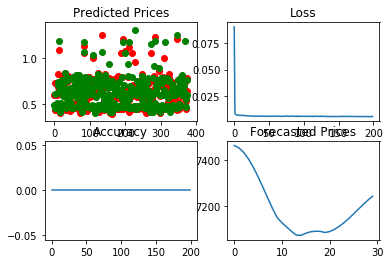

In [39]:
plt.figure()
plt.subplot(2,2,1)
plt.scatter(range(len(result)), result,c = 'r')
plt.scatter(range(len(y_test)), y_test,c = 'g')
plt.title('Predicted Prices')

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.title('Loss')

plt.subplot(2,2,3)
plt.plot(history.history['acc'])
plt.title('Accuracy')

plt.subplot(2,2,4)
plt.plot(predictionsadjusted)
plt.title('Forecasted Prices')
plt.show()